In [1]:
import pandas as pd
import numpy as np
from PIL import Image
import seaborn as sns
import csv
#from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA, TruncatedSVD, NMF
from scipy import signal
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster.bicluster import SpectralBiclustering
from sklearn.datasets import samples_generator as sg
from sklearn.metrics import consensus_score


%matplotlib inline

In [2]:
input_path = '../joke_recommender/data/'
df = pd.read_csv(input_path + 'scaled_df.csv')
df = df.drop(['Unnamed: 0'], axis = 1)
df 

,0,1,2,3,4,5,6,7,8,9,...,73412,73413,73414,73415,73416,73417,73418,73419,73420,73421
0,1.779864,1.065648,1.332255,1.898623,1.057602,1.992216,1.350401,1.688979,1.246819,1.114807,...,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,1.769431,1.513865,1.364078,1.291460,1.483653,2.000000,1.503393,1.562608,1.265267,1.250000,...,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
2,1.605112,1.675722,1.403452,1.336639,1.483653,1.309808,1.374460,1.943451,1.067430,1.351931,...,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
3,1.296296,1.302207,1.515642,1.507989,1.979761,1.994811,1.167798,1.537796,1.262087,1.437768,...,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
4,1.782473,1.868138,1.926645,1.850138,1.911780,1.692787,1.934608,1.476053,1.558524,1.742489,...,1.707087,1.765074,1.19598,1.0,1.079971,1.784543,2.0,1.142857,1.595135,1.877922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.842984,1.505376,1.735707,1.721763,1.987545,1.614427,1.626157,1.579342,1.919847,1.586373,...,1.631783,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
96,1.255608,1.508206,1.172600,1.363636,1.989621,1.617021,1.550895,1.817657,1.849237,1.568133,...,0.000000,0.000000,0.00000,0.0,0.000000,1.949649,0.0,0.000000,0.000000,0.000000
97,1.503912,1.796831,1.149407,1.564187,1.989621,1.692787,1.536089,1.621466,1.830153,1.781652,...,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
98,1.683359,1.458970,1.395361,1.633609,1.984951,1.989621,1.703886,1.686093,1.895038,1.947961,...,1.911406,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


In [3]:
df.index = np.arange(1, len(df) + 1)
X = df.T.reset_index(drop=True)
X

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,1.779864,1.769431,1.605112,1.296296,1.782473,1.605112,1.762128,1.685968,1.379760,1.440271,...,1.792384,1.273344,1.701095,1.888367,1.561815,1.842984,1.255608,1.503912,1.683359,1.741784
1,1.065648,1.513865,1.675722,1.302207,1.868138,1.518959,1.653650,1.623656,1.071307,1.299377,...,1.766271,1.631579,1.724958,1.560272,1.464063,1.505376,1.508206,1.796831,1.458970,1.730617
2,1.332255,1.364078,1.403452,1.515642,1.926645,1.588997,1.230313,1.601942,1.067961,1.756742,...,1.620280,1.303668,1.444984,1.610032,1.316613,1.735707,1.172600,1.149407,1.395361,1.122977
3,1.898623,1.291460,1.336639,1.507989,1.850138,1.871625,1.090909,1.906336,1.221488,1.111846,...,1.258953,1.855647,1.764738,1.219284,1.850138,1.721763,1.363636,1.564187,1.633609,1.486501
4,1.057602,1.483653,1.483653,1.979761,1.911780,1.941879,1.725480,1.644525,1.012455,1.642449,...,1.498703,2.000000,1.944473,1.987545,1.334717,1.987545,1.989621,1.989621,1.984951,1.979761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73417,0.000000,0.000000,0.000000,0.000000,1.784543,0.000000,1.432084,1.011710,0.000000,0.000000,...,1.909836,0.000000,0.000000,0.000000,0.000000,0.000000,1.949649,0.000000,0.000000,0.000000
73418,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,1.936376,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
73419,0.000000,0.000000,0.000000,0.000000,1.142857,0.000000,0.000000,1.062455,0.000000,0.000000,...,1.550610,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
73420,0.000000,0.000000,0.000000,0.000000,1.595135,0.000000,1.274544,1.413553,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [76]:
Xsub = X.iloc[14500:16500,:]
Xsub

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
14500,1.096453,1.782203,1.510268,1.175482,1.000000,1.713130,1.096453,1.755445,1.652769,1.697573,...,1.721842,1.758556,1.302427,1.489732,1.054138,1.706907,1.163037,1.187306,1.329185,1.163037
14501,1.700108,1.086768,1.808026,1.000000,1.349783,1.937093,1.447397,1.276030,1.839479,1.992408,...,1.968547,1.834599,1.944685,1.971258,1.829176,1.839479,1.926247,1.491866,1.795011,1.705531
14502,1.893341,1.600451,1.542889,1.729120,1.383747,1.912528,1.942438,1.547968,1.838600,1.909707,...,1.912528,1.830135,1.918172,1.945260,1.159142,1.767494,1.940181,1.460497,1.646727,1.822235
14503,1.072836,1.892537,1.988657,1.834627,1.805970,1.420299,1.414328,1.640597,1.454925,1.973731,...,1.354030,1.333731,1.939104,1.846567,1.449552,1.452537,1.939104,1.951045,1.237612,1.794030
14504,1.292141,1.665583,1.063415,1.173984,1.771274,1.879133,1.950136,1.442276,1.118699,1.842276,...,1.047696,1.021138,1.047696,1.036856,1.021138,1.010840,1.810298,1.965854,1.137127,1.081843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16495,1.000000,1.219912,1.216761,1.400756,1.284184,1.541273,1.458727,1.171393,1.495274,1.666667,...,1.449275,1.406427,1.648393,1.385003,1.427851,1.587272,1.651544,1.688091,1.590422,1.654694
16496,1.036957,1.105435,1.667391,1.319565,1.348370,1.551630,1.082065,1.036957,1.390761,1.609239,...,1.852174,2.000000,1.685870,1.826087,1.190217,1.284783,1.630435,1.886413,1.902174,1.817935
16497,1.356738,1.489241,1.291053,1.379388,1.450736,1.830125,1.460929,1.389581,1.543601,1.939977,...,1.626274,1.225368,1.400906,1.312571,1.494904,1.406569,1.346546,1.428086,1.582106,1.576444
16498,1.316517,1.154597,1.170057,1.241660,1.340114,1.817738,1.375915,1.553295,1.715216,1.817738,...,1.853539,1.810415,1.593165,1.794142,1.821806,1.778682,1.525631,1.596420,1.663954,1.655818


In [77]:
# set up variables
XMask = (Xsub!=0).astype('int') # 0: missing, 1: observed
XOnes = pd.DataFrame(np.ones(Xsub.shape))

nonzero_loc = np.where(Xsub!=0)

I = len(Xsub.index)    # number of users
J = 100                # number of jokes

# number of latent factors
k = 5

U = np.random.uniform(0, 2, size=k*I).reshape((I, k))
V = np.random.uniform(0, 2, size=k*J).reshape((J, k))

In [78]:
residual2 = []

rate = 0.1

for t in tqdm_notebook(range(0, 3)):
    # compute error after one sweep of updates
    E = (Xsub - np.inner(U, V))*XMask
    residual2 += [np.linalg.norm(E, 'fro')]
    for i, j in zip(*nonzero_loc):
        U[i] = U[i] + rate*V[j]*(Xsub.iloc[i,j] - np.inner(U[i], V[j]))
        V[j] = V[j] + rate*U[i]*(Xsub.iloc[i,j] - np.inner(U[i], V[j]))

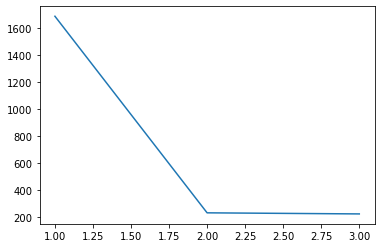

In [24]:
sns.lineplot(range(1,4), residual2);

In [79]:
XsubFit = pd.DataFrame(np.inner(U, V)*XOnes)

XsubFitFixed = np.minimum(XsubFit, 2)
XsubFitFixed = np.maximum(XsubFitFixed, 0).set_index(Xsub.index).rename(columns=lambda x: x+1)
XsubFitFixed.head(15)

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
14500,1.649970,1.062543,1.068764,1.023584,0.945841,0.971800,0.958563,0.945047,0.965061,1.002111,...,1.171737,0.907258,1.003941,0.899307,1.013059,0.780356,1.257912,1.163959,1.132293,1.167029
14501,2.000000,1.635000,1.642747,1.573629,1.488412,1.528713,1.501281,1.492141,1.526359,1.573820,...,1.735235,1.392780,1.537674,1.414468,1.617902,1.205871,2.000000,1.726887,1.700697,1.710106
14502,2.000000,1.546676,1.558037,1.471796,1.713249,1.733150,1.720945,1.698645,1.720632,1.749324,...,1.812083,1.491434,1.698664,1.627863,1.663535,1.586096,2.000000,1.827159,1.611614,1.826128
14503,2.000000,1.572440,1.580902,1.492960,1.766175,1.786876,1.770157,1.758988,1.779864,1.801548,...,1.804524,1.402551,1.725884,1.703889,1.695658,1.615368,2.000000,1.818189,1.565257,1.795285
14504,1.786552,1.020181,1.024056,0.966869,1.225057,1.236694,1.220213,1.212322,1.235044,1.236547,...,1.116617,1.093826,1.250595,1.287074,1.153623,1.376404,2.000000,1.168914,0.898491,1.085905
14505,2.000000,1.645284,1.652811,1.566428,1.780938,1.806727,1.787144,1.771637,1.798375,1.825138,...,1.857632,1.495208,1.816839,1.789422,1.713407,1.747529,2.000000,1.886842,1.585976,1.832123
14506,2.000000,1.971304,1.976339,1.905467,1.666986,1.725749,1.678555,1.681247,1.734189,1.790374,...,1.934109,1.647633,1.769877,1.639897,1.919536,1.351514,2.000000,1.932659,1.965816,1.859288
14507,1.776074,1.218597,1.222969,1.163944,1.169186,1.195930,1.176546,1.190984,1.201098,1.230425,...,1.322078,0.703292,1.032574,0.977804,1.247532,0.582873,1.159568,1.261672,1.319390,1.309498
14508,2.000000,1.393173,1.397248,1.326294,1.495312,1.519089,1.499133,1.490781,1.514824,1.534771,...,1.538272,1.218258,1.545093,1.548813,1.429116,1.511875,2.000000,1.569169,1.278421,1.496535
14509,2.000000,1.662619,1.673487,1.584236,1.798541,1.823875,1.801892,1.796779,1.822033,1.849396,...,1.856701,1.492933,1.688239,1.618198,1.842368,1.420001,2.000000,1.845945,1.772327,1.862317


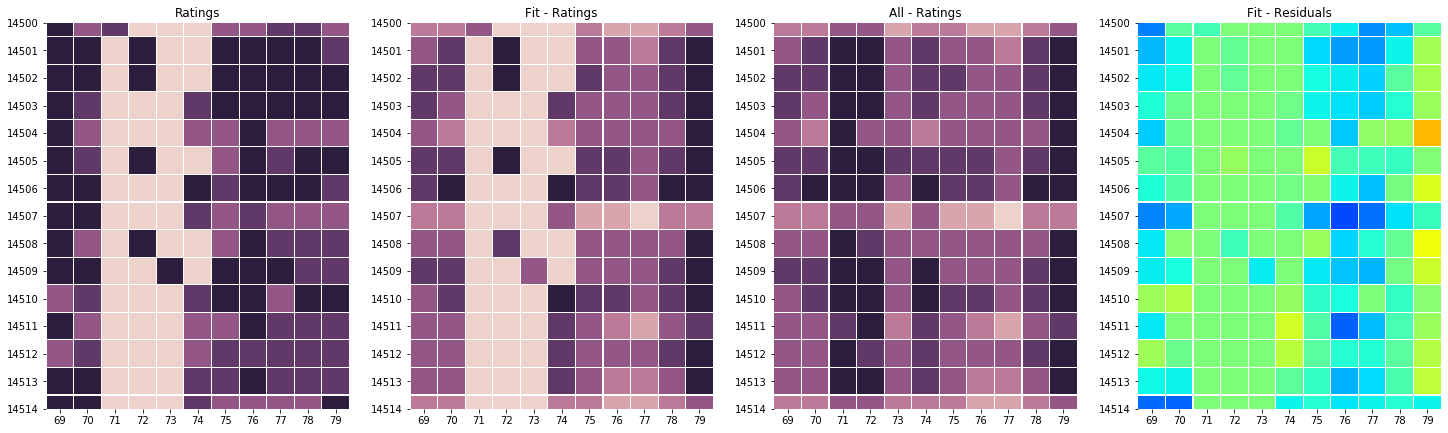

In [80]:
fig, ax = plt.subplots(ncols=4, figsize=(25, 15))

# heatmap of observed ratings for 15 users and 11 jokes
sns.heatmap(Xsub.iloc[0:15,68:79],
            ax=ax[0], vmin=0, vmax=2, square=True, linewidths=0.1,
            cbar=False, cmap=sns.cubehelix_palette(6));
ax[0].set_title('Ratings')

# heatmap showing fitted values for 
fit_ratings = pd.DataFrame(XsubFitFixed.values*XMask.values, columns=Xsub.columns, index=Xsub.index)
sns.heatmap(fit_ratings.iloc[0:15,68:79], 
            ax=ax[1], vmin=0, vmax=2, square=True, linewidths=0.1,
            cbar=False, cmap=sns.cubehelix_palette(6));
ax[1].set_title('Fit - Ratings')

sns.heatmap(XsubFitFixed.iloc[0:15,68:79], 
            ax=ax[2], vmin=0, vmax=2, square=True, linewidths=0.1,
            cbar=False, cmap=sns.cubehelix_palette(6));
ax[2].set_title('All - Ratings')

fit_resid = pd.DataFrame(fit_ratings - Xsub, columns=Xsub.columns, index=Xsub.index)
sns.heatmap(fit_resid.iloc[0:15,68:79] , center=0,
            ax=ax[3], vmin=-2, vmax=2, square=True, linewidths=0.1,
            cbar=False, cmap='jet');
ax[3].set_title('Fit - Residuals');